In [201]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=True)

$$ L_1 \cos\theta_1 + L_2 \cos(\theta_1 + \theta_2) - Px = 0 = f_1 $$
$$ L_1 \sin\theta_1 + L_2 \sin(\theta_1 + \theta_2) - Py = 0 = f_2 $$

In [209]:
px,py = 130, 80
L1,L2 = 100, 100
t1,t2 = symbols("\\theta_1, \\theta_2")

f1 = L1*cos(t1) + L2*cos(t1+t2) - px
f2 = L1*sin(t1) + L2*sin(t1+t2) - py

eps = 0.001

B = Matrix([f1,f2])
J = B.jacobian([t1,t2])

X0 = { t1:rad(-2), t2:rad(70) }

s1,s2 = nr(J,B,X0)
s1

In [210]:
def nr(J,B,X0,eps=0.001):
    while True:
        ji = J.subs(X0).evalf()
        bi = B.subs(X0).evalf()
        Dxi = ji.inv()*-bi
        if Dxi.norm() < eps:
            break
        for k,var in enumerate(X0): 
            X0[var] += Dxi[k]
    return X0

In [211]:
for k,var in enumerate(X0):
    print(k,var)

0 \theta_1
1 \theta_2


In [212]:
import numpy as np
L1 = L2 = 100
T1, T2 = [], []
X0 = {t1:rad(-15), t2:rad(85)}

for py in np.linspace(50,150,20):
    px = 120
    f1 = L1*cos(t1) + L2*cos(t1+t2) - px
    f2 = L1*sin(t1) + L2*sin(t1+t2) - py
    B = Matrix([f1,f2])
    J = B.jacobian([t1,t2])
    
    ts = nr(J,B,X0)
    T1.append(ts[t1])
    T2.append(ts[t2])
    X0[t1] = ts[t1]
    X0[t2] = ts[t2]

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

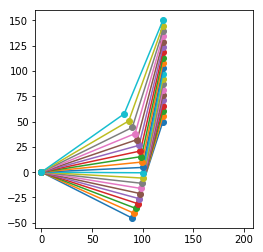

In [214]:
O = [0, 0]
for k,_ in enumerate(T1):
    A = [L1*cos(T1[k]), L1*sin(T1[k])]
    B = [L1*cos(T1[k]) + L2*cos(T1[k] + T2[k]), L1*sin(T1[k]) + L2*sin(T1[k]+T2[k])]
    plt.plot([O[0],A[0],B[0]], [O[1],A[1],B[1]],"-o")
    plt.axis("square")